In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.stats import beta,uniform

The **Acceptance-Rejection** method is an algorithm to generate random variates from a distribution for which it may be difficult to sample from. Let $X$ and $Y$ be two random variables with respective PDF f(hard) and g(proposal), and let c be a constant such that, for all $x$, we have,

$$f(x)\leq cg(x)$$

For the univariate case, the algorithm proceeds as follows:

1. Generate $x$ from a Proposal distribution, easy to sample from.
2. Generate $y$ uniformly in the interval $[0,cg(x)]$ 

$$c\leq \max f(x)$$
3. Accept $x$ if $y\leq f(x)$ else repeat.

---

Let $Y\sim f_Y(y)$ and $V\sim f_V(V)$, where $f_Y$ and $f_V$ have common support with, 

$$\frac{f_Y(y)}{M f_V(y)}\leq 1$$

To generate a random variable $Y\sim f_Y$,

a. Generate $U \sim \mathbb{U}(0,1)$, $V\sim f_V$, independent. 

b. If $U<\frac{1}{M}f_Y(V)/f_V(V)$, set $Y=V$; otherwise, return to step (a).

**Example 1** Sample from beta distribution $B(6.3,2.7)$. Use the Acceptance-Rejection algorithm to sample from this distribution using $N=10000$ simulations.

$$\begin{align*}
g(x) &\sim \mathbb{U}[0,1] \\
f(x) &\sim B(6.3,2.7)\\
\end{align*}$$

In [2]:
N = 10000
X = np.random.uniform(0,1,N)
c = max(beta.pdf(X,6.3,2.7))

Since $c\leq \max f(x)$, $c=2.67$

(array([  2.,   0.,   1.,   0.,   1.,   3.,   3.,  18.,  11.,  24.,  28.,
         30.,  27.,  34.,  47.,  42.,  83., 101.,  91., 124., 120., 131.,
        166., 167., 171., 187., 198., 216., 202., 213., 212., 196., 181.,
        155., 159., 135., 107.,  78.,  47.,  22.]),
 array([0.13325453, 0.15461315, 0.17597178, 0.1973304 , 0.21868902,
        0.24004765, 0.26140627, 0.2827649 , 0.30412352, 0.32548215,
        0.34684077, 0.3681994 , 0.38955802, 0.41091665, 0.43227527,
        0.4536339 , 0.47499252, 0.49635115, 0.51770977, 0.5390684 ,
        0.56042702, 0.58178564, 0.60314427, 0.62450289, 0.64586152,
        0.66722014, 0.68857877, 0.70993739, 0.73129602, 0.75265464,
        0.77401327, 0.79537189, 0.81673052, 0.83808914, 0.85944777,
        0.88080639, 0.90216502, 0.92352364, 0.94488227, 0.96624089,
        0.98759951]),
 <a list of 40 Patch objects>)

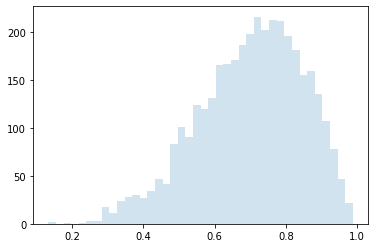

In [3]:
Y = np.random.uniform(0,1,N)
# plt.hist(X[Y<=beta.pdf(X,6.3,2.7)],40)
accept = Y[X<=beta.pdf(Y,6.3,2.7)/c]
# plt.scatter(accept,beta.pdf(accept,6.3,2.7))
plt.hist(accept,40,alpha=0.2)

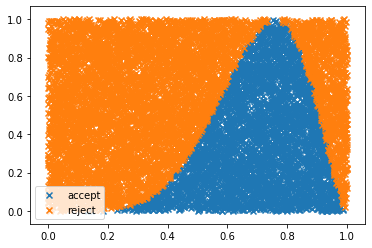

In [4]:
sa = X<=beta.pdf(Y,6.3,2.7)/c
sr = X>beta.pdf(Y,6.3,2.7)/c
plt.scatter(Y[sa],X[sa],marker="x",label="accept")
plt.scatter(Y[sr],X[sr],marker="x",label="reject")
plt.legend()

In [5]:
# Acceptance ratio
len(Y[sa])/len(X)

0.3733

In [6]:
# estimated mean
print(np.mean(Y[sa]))
# theoretical mean
print(6.3/(6.3+2.7))

0.7004256360541342
0.7


In [7]:
Y.shape

(10000,)

### Direct approximation from python function

(array([0.9560756 , 0.96807655, 1.10408731, 1.00007908, 1.07208478,
        0.91207212, 1.09608668, 1.01208003, 0.96807655, 1.02008067,
        0.97207687, 1.00807972, 1.08008541, 0.99607877, 0.96007592,
        1.03608193, 1.08808604, 0.99207845, 0.96407624, 1.02008067,
        0.92407307, 0.95207529, 0.99607877, 0.97607719, 0.90007118,
        0.8560677 , 1.04808288, 0.92007276, 1.01208003, 1.04408256,
        0.9560756 , 1.14409047, 0.99207845, 1.08408573, 1.03208162,
        0.97607719, 0.94007434, 1.04408256, 0.94807497, 1.03208162]),
 array([6.11296375e-05, 2.50591527e-02, 5.00571757e-02, 7.50551988e-02,
        1.00053222e-01, 1.25051245e-01, 1.50049268e-01, 1.75047291e-01,
        2.00045314e-01, 2.25043337e-01, 2.50041360e-01, 2.75039383e-01,
        3.00037406e-01, 3.25035429e-01, 3.50033452e-01, 3.75031475e-01,
        4.00029498e-01, 4.25027521e-01, 4.50025544e-01, 4.75023568e-01,
        5.00021591e-01, 5.25019614e-01, 5.50017637e-01, 5.75015660e-01,
        6.00013683e-01

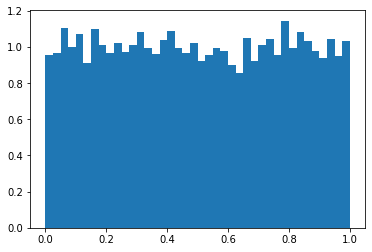

In [8]:
r = uniform.rvs(size=N)
plt.hist(r,40,density=True)

(array([  3.,   4.,   4.,  10.,   6.,  20.,  13.,  26.,  41.,  44.,  64.,
         79., 109., 132., 173., 209., 222., 261., 242., 346., 328., 378.,
        404., 450., 507., 501., 532., 596., 565., 553., 527., 547., 470.,
        445., 361., 296., 257., 161.,  89.,  25.]),
 array([0.15799081, 0.17886724, 0.19974366, 0.22062008, 0.2414965 ,
        0.26237292, 0.28324935, 0.30412577, 0.32500219, 0.34587861,
        0.36675503, 0.38763146, 0.40850788, 0.4293843 , 0.45026072,
        0.47113714, 0.49201357, 0.51288999, 0.53376641, 0.55464283,
        0.57551925, 0.59639568, 0.6172721 , 0.63814852, 0.65902494,
        0.67990136, 0.70077779, 0.72165421, 0.74253063, 0.76340705,
        0.78428347, 0.8051599 , 0.82603632, 0.84691274, 0.86778916,
        0.88866558, 0.90954201, 0.93041843, 0.95129485, 0.97217127,
        0.99304769]),
 <a list of 40 Patch objects>)

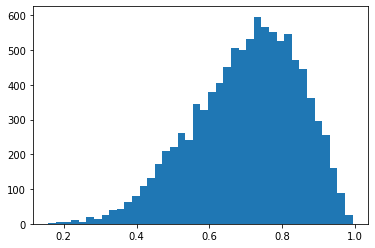

In [9]:
r = beta.rvs(6.3,2.7,size=N)
plt.hist(r,40)

In [10]:
print(r,len(r)/N)

[0.7536359  0.82020111 0.52007241 ... 0.71671534 0.81549731 0.60176575] 1.0


---
---
**Example 2** $X$ is the survival time of some butterflies and that $X\sim e^\theta$, with PDF and CDF given respectively by,
$$\begin{align*}
f_\theta(x) &= \theta e^{-\theta x}\\
F_{-\theta}(x) &= 1-e^{-\theta x}
\end{align*}$$

The following table is the survival time, 

|Number of week|0|1|2|3|4|5|
|---|---|---|---|---|---|---|
|Number of butterflies alive|10|6|3|2|2|0|
|Number of butterflies dead|0|4|3|1|0|2|

(i) What is the posterior distribution of the data if we do not want to be informative and use a Jeffrey's prior?

---
(ii) What is the mean survival time and a $95%$ Credible Interval for the mean survival time using Acceptance-Rejection method? 

- https://rh8liuqy.github.io/Accept_reject.html
- http://approximateinference.org/2016/accepted/NaessethEtAl2016.pdf
- https://www.youtube.com/watch?v=qmLl-oQdopc&t=183s
- https://arxiv.org/pdf/1601.00670.pdf
- http://www.columbia.edu/~ks20/4703-Sigman/4703-07-Notes-ARM.pdf
- https://bjlkeng.github.io/posts/sampling-from-a-normal-distribution/
- https://www.tweag.io/blog/2020-01-09-mcmc-intro2/